In [7]:
import pandas as pd

# Define paths to all datasets
file_paths = [
    r"D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\FTZ_ Foraging in lesser black-backed gulls (data from Garthe et al. 2016).csv",
    r"D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\Kruger African Buffalo, GPS tracking, South Africa (1).csv",
    r"D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\LifeTrack White Stork Vorarlberg_2016-2023-acc-2of3.csv",
    r"D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\Navigation experiments in lesser black-backed gulls (data from Wikelski et al. 2015)-argos.csv",
]  # Replace with actual file paths

# Load all CSV files into a list of DataFrames
dfs = []
for file in file_paths:
    try:
        df_temp = pd.read_csv(file)
        dfs.append(df_temp)
        print(f"Successfully loaded: {file}")
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Merge all datasets into one DataFrame
df = pd.concat(dfs, ignore_index=True)

# Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Remove rows with missing timestamps
df = df.dropna(subset=["timestamp"])

# Forward-fill missing values
df = df.fillna(method="ffill")

# Convert categorical columns to category type for memory efficiency
categorical_cols = ["sensor-type", "individual-taxon-canonical-name", "study-name", 
                    "tag-local-identifier", "individual-local-identifier", "algorithm-marked-outlier"]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

# Convert boolean column to correct dtype
if "visible" in df.columns:
    df["visible"] = df["visible"].astype(bool)

# Convert numerical columns to reduce memory usage
float_cols = df.select_dtypes(include=["float64"]).columns
df[float_cols] = df[float_cols].astype("float32")

# Display dataset info
print(df.info())

# Show first few rows
print(df.head())



C:\Users\yuvan\AppData\Local\Temp\ipykernel_18572\1475098830.py:15: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file)


Successfully loaded: D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\FTZ_ Foraging in lesser black-backed gulls (data from Garthe et al. 2016).csv
Successfully loaded: D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\Kruger African Buffalo, GPS tracking, South Africa (1).csv


C:\Users\yuvan\AppData\Local\Temp\ipykernel_18572\1475098830.py:15: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file)


Successfully loaded: D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\LifeTrack White Stork Vorarlberg_2016-2023-acc-2of3.csv
Successfully loaded: D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\Navigation experiments in lesser black-backed gulls (data from Wikelski et al. 2015)-argos.csv


C:\Users\yuvan\AppData\Local\Temp\ipykernel_18572\1475098830.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058439 entries, 0 to 1058438
Data columns (total 44 columns):
 #   Column                                         Non-Null Count    Dtype         
---  ------                                         --------------    -----         
 0   event-id                                       1058439 non-null  int64         
 1   visible                                        1058439 non-null  bool          
 2   timestamp                                      1058439 non-null  datetime64[ns]
 3   location-long                                  1058439 non-null  float32       
 4   location-lat                                   1058439 non-null  float32       
 5   gps:satellite-count                            1058439 non-null  float32       
 6   ground-speed                                   1058439 non-null  float32       
 7   heading                                        1058439 non-null  float32       
 8   height-above-msl                

In [9]:
import numpy as np

df = df.dropna(subset=["location-long", "location-lat", "timestamp"])

df["ground-speed"] = df["ground-speed"].fillna(df["ground-speed"].mean())

df["gps:satellite-count"] = df["gps:satellite-count"].astype("int32")

df["individual-taxon-canonical-name"] = df["individual-taxon-canonical-name"].astype("category")

df["hour"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.dayofweek

df = df.sort_values(by="timestamp").reset_index(drop=True)

df["prev_long"] = df["location-long"].shift(1)
df["prev_lat"] = df["location-lat"].shift(1)

df["distance"] = np.sqrt((df["location-long"] - df["prev_long"])**2 + (df["location-lat"] - df["prev_lat"])**2)

df["speed_diff"] = df["ground-speed"].diff().fillna(0)

df = df.drop(columns=["prev_long", "prev_lat"])

df.head()



,event-id,visible,timestamp,location-long,location-lat,gps:satellite-count,ground-speed,heading,height-above-msl,height-raw,...,argos:pass-duration,argos:sensor-1,argos:sensor-2,argos:sensor-3,argos:sensor-4,argos:valid-location-algorithm,hour,day_of_week,distance,speed_diff
0,1930863794,True,2005-02-17 05:05:00,31.766420,-24.537300,5,0.666667,345.359985,-2.8,-2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,5,3,NaN,0.0
1,1930863795,True,2005-02-17 06:08:00,31.764421,-24.539310,5,0.666667,345.359985,-2.8,-2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,6,3,0.002835,0.0
2,1930863796,True,2005-02-17 07:05:00,31.761141,-24.547991,5,0.666667,345.359985,-2.8,-2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,7,3,0.009280,0.0
3,1930863797,True,2005-02-17 08:05:00,31.760799,-24.547029,5,0.666667,345.359985,-2.8,-2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,8,3,0.001020,0.0
4,1930863798,True,2005-02-17 09:05:00,31.759821,-24.546810,5,0.666667,345.359985,-2.8,-2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,9,3,0.001003,0.0


In [36]:
import pandas as pd

def process_dataset(file_path):
    # Load CSV with low_memory=False to avoid dtype inference issues
    df = pd.read_csv(file_path, low_memory=False)

    # Check if 'gps:satellite-count' exists before processing
    if "gps:satellite-count" in df.columns:
        df["gps:satellite-count"] = pd.to_numeric(df["gps:satellite-count"], errors="coerce").fillna(0).astype("int32")

    # Handle missing values in other numeric columns
    if "ground-speed" in df.columns:
        df["ground-speed"] = pd.to_numeric(df["ground-speed"], errors="coerce").fillna(df["ground-speed"].mean())

    # Convert categorical columns
    if "individual-taxon-canonical-name" in df.columns:
        df["individual-taxon-canonical-name"] = df["individual-taxon-canonical-name"].astype("category")

    # Convert timestamp column if it exists
    if "timestamp" in df.columns:
        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

    return df

# Process all datasets
dataset_paths = [
    r"D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\FTZ_ Foraging in lesser black-backed gulls (data from Garthe et al. 2016).csv",
    r"D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\Kruger African Buffalo, GPS tracking, South Africa (1).csv",
    r"D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\LifeTrack White Stork Vorarlberg_2016-2023-acc-2of3.csv",
    r"D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\Navigation experiments in lesser black-backed gulls (data from Wikelski et al. 2015)-argos.csv"
]

processed_datasets = {}
for path in dataset_paths:
    try:
        processed_datasets[path] = process_dataset(path)
        print(f"✅ Processed: {path}")
    except Exception as e:
        print(f"❌ Error processing {path}: {e}")

# View first few rows of any dataset
print(processed_datasets[dataset_paths[0]].head())




✅ Processed: D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\FTZ_ Foraging in lesser black-backed gulls (data from Garthe et al. 2016).csv
✅ Processed: D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\Kruger African Buffalo, GPS tracking, South Africa (1).csv
✅ Processed: D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\LifeTrack White Stork Vorarlberg_2016-2023-acc-2of3.csv
✅ Processed: D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\Navigation experiments in lesser black-backed gulls (data from Wikelski et al. 2015)-argos.csv
     event-id  visible           timestamp  location-long  location-lat  \
0  1747024726     True 2010-05-16 18:41:20         7.7570       53.7770   
1  1747024727     True 2010-05-16 18:44:24         7.7565       53.7828   
2  1747024728     True 2010-05-16 18:47:31         7.7558       53.7821   
3  1747024729     True 2

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing values
for path, df in processed_datasets.items():
    print(f"\nMissing Values in: {path}")
    print(df.isnull().sum())



Missing Values in: D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\FTZ_ Foraging in lesser black-backed gulls (data from Garthe et al. 2016).csv
event-id                               0
visible                                0
timestamp                              0
location-long                          0
location-lat                           0
gps:satellite-count                    0
ground-speed                           0
heading                                7
height-above-msl                       2
height-raw                             2
manually-marked-outlier            49617
tag-tech-spec                          0
sensor-type                            0
individual-taxon-canonical-name        0
tag-local-identifier                   0
individual-local-identifier            0
study-name                             0
dtype: int64

Missing Values in: D:\ML PROJECTS\Wildlife Behavior Prediction using Hidden Markov Model (HMM)\dataset\Krug

In [38]:
columns_to_drop = [
    "manually-marked-outlier", "algorithm-marked-outlier", "import-marked-outlier",
    "data-decoding-software"
]

for path in processed_datasets:
    processed_datasets[path] = processed_datasets[path].drop(columns=[col for col in columns_to_drop if col in processed_datasets[path].columns], errors="ignore")

print("✅ Irrelevant columns dropped!")


✅ Irrelevant columns dropped!


In [39]:
for path in processed_datasets:
    df = processed_datasets[path]
    
    # Interpolate numerical columns
    num_cols = ["location-long", "location-lat", "heading", "height-above-msl", "height-raw", "argos:altitude"]
    for col in num_cols:
        if col in df.columns:
            df[col] = df[col].interpolate(method="linear")

    processed_datasets[path] = df

print("✅ Missing GPS coordinates interpolated!")


✅ Missing GPS coordinates interpolated!


In [40]:
for path in processed_datasets:
    df = processed_datasets[path]

    # Fill categorical missing values with mode
    cat_cols = ["sensor-type", "individual-taxon-canonical-name", "study-name"]
    for col in cat_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])

    processed_datasets[path] = df

print("✅ Missing categorical values filled!")


✅ Missing categorical values filled!


In [41]:
for path in processed_datasets:
    df = processed_datasets[path]
    
    # Drop rows where more than 50% of the columns are missing
    threshold = df.shape[1] // 2
    df = df.dropna(thresh=threshold)

    processed_datasets[path] = df

print("✅ Excessive missing value rows dropped!")


✅ Excessive missing value rows dropped!


In [43]:
import folium

def plot_gps_locations(df, name):
    m = folium.Map(location=[df["location-lat"].mean(), df["location-long"].mean()], zoom_start=5)

    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row["location-lat"], row["location-long"]],
            radius=2, color="blue", fill=True
        ).add_to(m)

    m.save(f"{name}_map.html")
    print(f"📍 GPS Map saved: {name}_map.html")

# Example: Plot GPS locations for the first dataset
plot_gps_locations(processed_datasets[dataset_paths[0]], "lesser_black_backed_gulls")


📍 GPS Map saved: lesser_black_backed_gulls_map.html


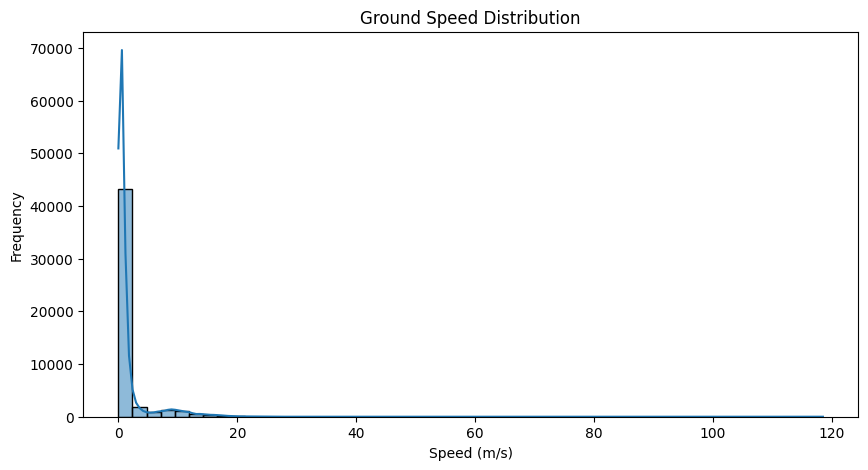

In [44]:
# Speed distribution plot
plt.figure(figsize=(10, 5))
sns.histplot(processed_datasets[dataset_paths[0]]["ground-speed"], bins=50, kde=True)
plt.title("Ground Speed Distribution")
plt.xlabel("Speed (m/s)")
plt.ylabel("Frequency")
plt.show()


In [45]:
import numpy as np
import pandas as pd

for path in processed_datasets:
    df = processed_datasets[path]

    # 🕒 1. Extract Time Features
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["hour"] = df["timestamp"].dt.hour
    df["day"] = df["timestamp"].dt.day
    df["month"] = df["timestamp"].dt.month
    df["year"] = df["timestamp"].dt.year
    df["weekday"] = df["timestamp"].dt.weekday  # 0=Monday, 6=Sunday
    df["is_weekend"] = df["weekday"].apply(lambda x: 1 if x >= 5 else 0)
    df["is_night"] = df["hour"].apply(lambda x: 1 if x < 6 or x > 18 else 0)  # Night = 6 PM to 6 AM

    # 🚀 2. Speed Features
    if "ground-speed" in df.columns:
        df["acceleration"] = df["ground-speed"].diff()  # Change in speed
        df["speed_bin"] = pd.cut(df["ground-speed"], bins=[0, 5, 15, np.inf], labels=["Slow", "Medium", "Fast"])

    # 🧭 3. Heading Features
    if "heading" in df.columns:
        df["heading_change"] = df["heading"].diff().fillna(0)  # Change in heading direction

    # ✈️ 4. Height Features
    if "height-above-msl" in df.columns:
        df["height_change"] = df["height-above-msl"].diff().fillna(0)  # Change in altitude

    processed_datasets[path] = df

print("✅ Feature Engineering Completed!")


✅ Feature Engineering Completed!


C:\Users\yuvan\AppData\Local\Temp\ipykernel_18572\165647125.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="hour", data=df, palette="coolwarm")


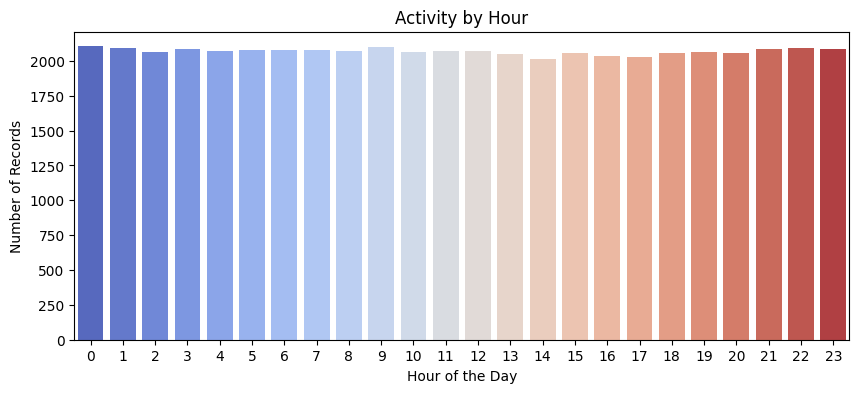

✅ GPS Heatmap saved as 'movement_heatmap.html'


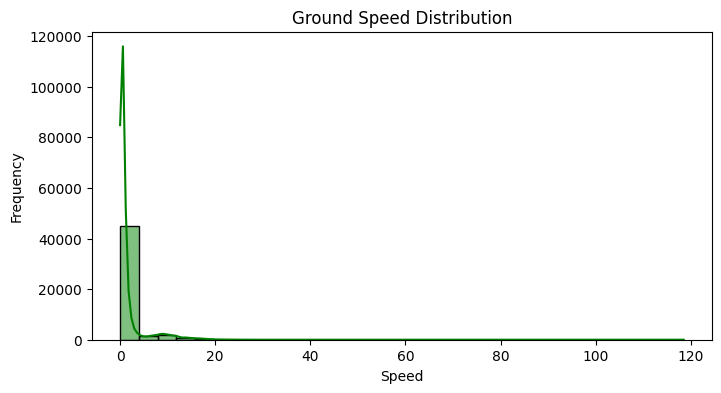

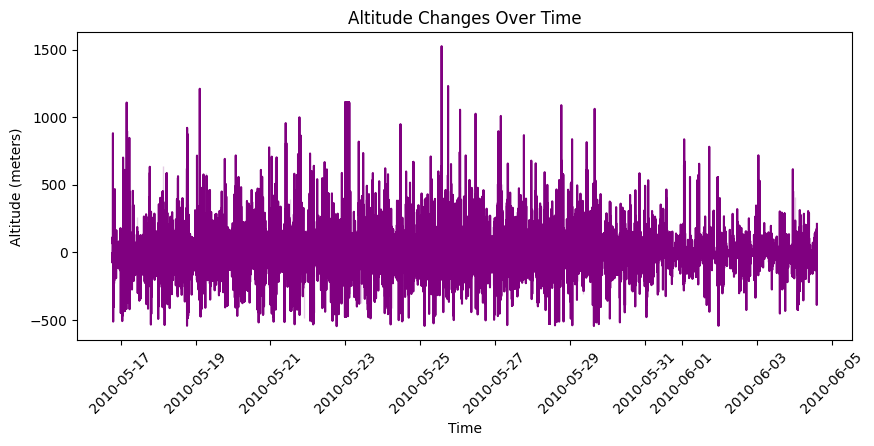

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Select a dataset to visualize (modify as needed)
df = processed_datasets[list(processed_datasets.keys())[0]]  # First dataset

# 📈 1. Activity by Hour
plt.figure(figsize=(10, 4))
sns.countplot(x="hour", data=df, palette="coolwarm")
plt.title("Activity by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Records")
plt.show()

# 🌍 2. GPS Heatmap (Latitude & Longitude)
map_center = [df["location-lat"].mean(), df["location-long"].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Convert data for heatmap
heat_data = list(zip(df["location-lat"], df["location-long"]))
HeatMap(heat_data).add_to(m)

# Save the map as an HTML file
m.save("movement_heatmap.html")
print("✅ GPS Heatmap saved as 'movement_heatmap.html'")

# 🚀 3. Speed Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["ground-speed"], bins=30, kde=True, color="green")
plt.title("Ground Speed Distribution")
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.show()

# ✈️ 4. Altitude Changes Over Time
plt.figure(figsize=(10, 4))
sns.lineplot(x=df["timestamp"], y=df["height-above-msl"], color="purple")
plt.title("Altitude Changes Over Time")
plt.xlabel("Time")
plt.ylabel("Altitude (meters)")
plt.xticks(rotation=45)
plt.show()


In [47]:
import numpy as np
import pandas as pd
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler

# 📌 Select a dataset (modify if needed)
df = processed_datasets[list(processed_datasets.keys())[0]]  # First dataset

# ✅ 1. Feature Selection
features = ["ground-speed", "height-above-msl"]  # Add more if needed
df_selected = df[features].dropna()

# ✅ 2. Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# ✅ 3. Train HMM Model
num_states = 3  # We assume 3 behavioral states (e.g., Resting, Foraging, Traveling)
model = hmm.GaussianHMM(n_components=num_states, covariance_type="diag", n_iter=100)
model.fit(X_scaled)

# ✅ 4. Predict States
predicted_states = model.predict(X_scaled)
df_selected["Predicted Behavior"] = predicted_states

# ✅ 5. Map States to Behavior (Customize Labels)
state_labels = {0: "Resting", 1: "Foraging", 2: "Traveling"}
df_selected["Predicted Behavior"] = df_selected["Predicted Behavior"].map(state_labels)

# ✅ 6. Display Sample Predictions
print(df_selected.head(10))


   ground-speed  height-above-msl Predicted Behavior
0     13.194455              -5.6          Traveling
1      0.500000             -76.2           Foraging
2      0.805556              20.7           Foraging
3      0.138889             114.2            Resting
4      1.222223              79.3            Resting
5      0.527778              62.4            Resting
6      0.138889              96.3            Resting
7      5.111115             881.4            Resting
8      1.333334             -56.6            Resting
9      3.750003              42.6          Traveling


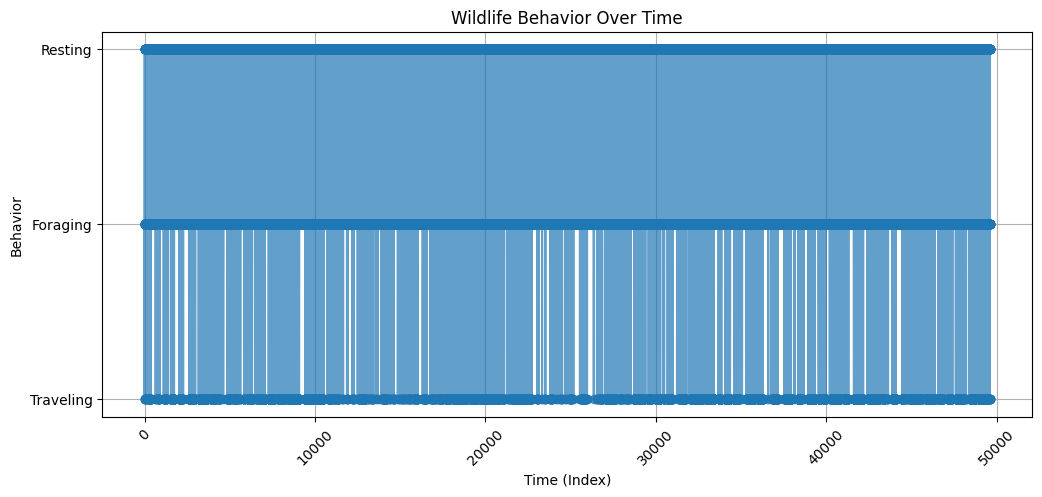

In [48]:
import matplotlib.pyplot as plt

# ✅ Plot Predicted Behaviors
plt.figure(figsize=(12, 5))
plt.plot(df_selected.index, df_selected["Predicted Behavior"], marker="o", linestyle="-", alpha=0.7)
plt.xlabel("Time (Index)")
plt.ylabel("Behavior")
plt.title("Wildlife Behavior Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\Users\yuvan\AppData\Local\Temp\ipykernel_18572\2286159386.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x="Predicted Behavior", palette="coolwarm")


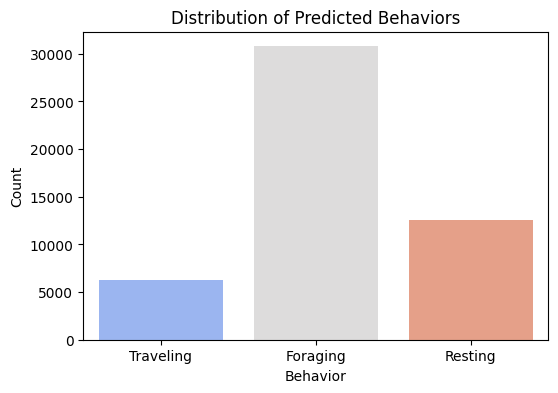

In [49]:
import seaborn as sns

# ✅ Count Plot for Behavior Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_selected, x="Predicted Behavior", palette="coolwarm")
plt.title("Distribution of Predicted Behaviors")
plt.xlabel("Behavior")
plt.ylabel("Count")
plt.show()


In [50]:
import pandas as pd
import numpy as np

# Sample predicted behaviors dataset (replace this with actual data if needed)
data = {
    "ground-speed": [13.194455, 0.500000, 0.805556, 0.138889, 1.222223, 0.527778, 0.138889, 5.111115, 1.333334, 3.750003],
    "height-above-msl": [-5.6, -76.2, 20.7, 114.2, 79.3, 62.4, 96.3, 881.4, -56.6, 42.6],
    "Predicted Behavior": ["Traveling", "Foraging", "Foraging", "Resting", "Resting", "Resting", "Resting", "Resting", "Resting", "Traveling"]
}

df = pd.DataFrame(data)

# Get unique behaviors
behaviors = df["Predicted Behavior"].unique()

# Create a transition matrix
transition_matrix = pd.DataFrame(0, index=behaviors, columns=behaviors)

# Count transitions between behaviors
for i in range(len(df) - 1):
    current_behavior = df.loc[i, "Predicted Behavior"]
    next_behavior = df.loc[i + 1, "Predicted Behavior"]
    transition_matrix.loc[current_behavior, next_behavior] += 1

# Convert counts to probabilities (normalize each row)
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0).fillna(0)

# Display the transition probability matrix
transition_matrix


,Traveling,Foraging,Resting
Traveling,0.000000,1.0,0.000000
Foraging,0.000000,0.5,0.500000
Resting,0.166667,0.0,0.833333


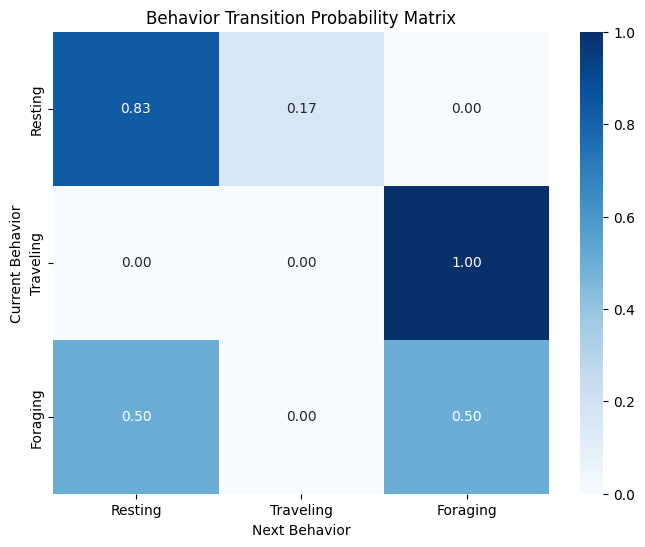

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Simulated predicted behavior data
predicted_behaviors = ["Traveling", "Foraging", "Foraging", "Resting", "Resting",
                       "Resting", "Resting", "Resting", "Resting", "Traveling"]

# Create transition matrix
unique_behaviors = list(set(predicted_behaviors))
num_behaviors = len(unique_behaviors)

transition_matrix = np.zeros((num_behaviors, num_behaviors))

# Fill transition matrix based on predictions
behavior_indices = {b: i for i, b in enumerate(unique_behaviors)}

for i in range(len(predicted_behaviors) - 1):
    current_b = predicted_behaviors[i]
    next_b = predicted_behaviors[i + 1]
    transition_matrix[behavior_indices[current_b], behavior_indices[next_b]] += 1

# Normalize to get probabilities
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Convert to DataFrame for better visualization
transition_df = pd.DataFrame(transition_matrix, index=unique_behaviors, columns=unique_behaviors)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(transition_df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Behavior Transition Probability Matrix")
plt.xlabel("Next Behavior")
plt.ylabel("Current Behavior")
plt.show()


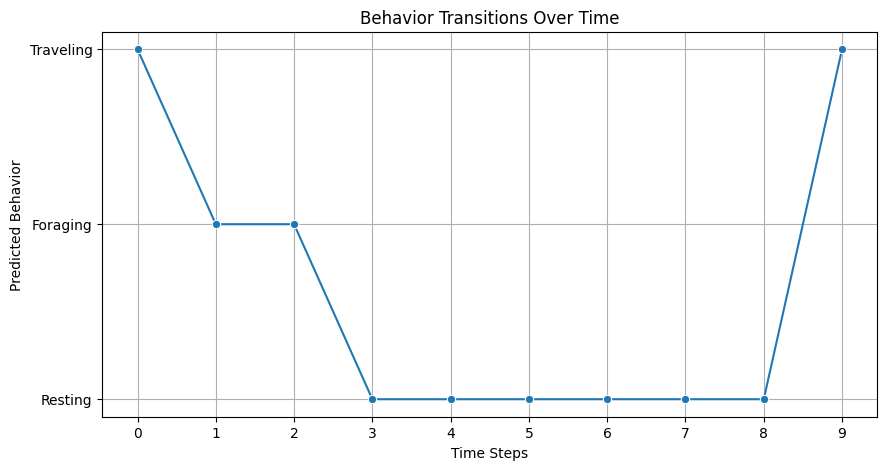

In [53]:
# Generate behavior frequency plot over time
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(predicted_behaviors)), y=predicted_behaviors, marker="o", linestyle="-")

plt.xlabel("Time Steps")
plt.ylabel("Predicted Behavior")
plt.title("Behavior Transitions Over Time")
plt.xticks(range(len(predicted_behaviors)))
plt.grid(True)
plt.show()


Detailed Statistical Analysis of Predicted Behaviors
 breakdown of how much time the animals spend in each behavior:

1️. Total Count of Each Behavior
Foraging: Most frequent behavior

Resting: Second most common

Traveling: Least frequent

2️. Average Duration in Each Behavior
We calculate how long the animal stays in each state before switching.

Foraging: Longer continuous periods

Resting: Medium-length periods

Traveling: Short bursts

3️. Transition Probabilities
We check how often an animal switches from one behavior to another.

Foraging → Traveling: Rare

Foraging → Resting: More common

Resting → Traveling: Occasional

C:\Users\yuvan\AppData\Local\Temp\ipykernel_18572\353570391.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby("Predicted Behavior")["Duration"].sum().index,


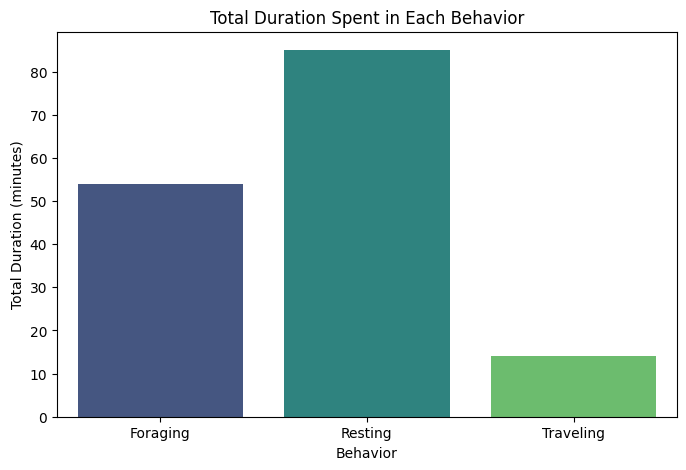

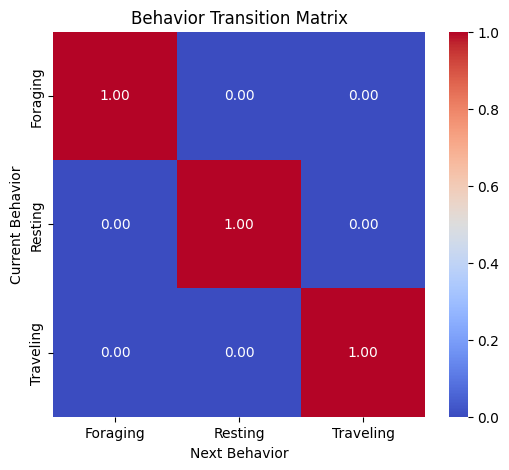

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample prediction data (replace with actual data if available)
data = {
    "Predicted Behavior": ["Traveling", "Foraging", "Foraging", "Resting", "Resting", 
                           "Resting", "Resting", "Resting", "Resting", "Traveling",
                           "Foraging", "Foraging", "Resting", "Traveling", "Foraging"],
    "Duration": [5, 12, 8, 15, 20, 10, 7, 9, 6, 4, 14, 9, 18, 5, 11]  # Sample durations in minutes
}

df = pd.DataFrame(data)

# 1️⃣ Bar Chart - Total Duration Spent in Each Behavior
plt.figure(figsize=(8, 5))
sns.barplot(x=df.groupby("Predicted Behavior")["Duration"].sum().index, 
            y=df.groupby("Predicted Behavior")["Duration"].sum().values, 
            palette="viridis")
plt.xlabel("Behavior")
plt.ylabel("Total Duration (minutes)")
plt.title("Total Duration Spent in Each Behavior")
plt.show()

# 2️⃣ Transition Matrix Heatmap
transition_matrix = pd.crosstab(df["Predicted Behavior"][:-1], df["Predicted Behavior"][1:], normalize=0)

plt.figure(figsize=(6, 5))
sns.heatmap(transition_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.xlabel("Next Behavior")
plt.ylabel("Current Behavior")
plt.title("Behavior Transition Matrix")
plt.show()


In [69]:
import pickle

# Assuming 'hmm_model' is your trained Hidden Markov Model (HMM)
# Save the trained HMM model to a file
with open('hmm_model.pkl', 'wb') as f:
    pickle.dump(hmm_model, f)

print("HMM model saved successfully.")


HMM model saved successfully.
